In [2]:

%pip install pandas matplotlib numpy seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns
df = pd.read_csv('pros.csv')
df.head

<bound method NDFrame.head of       ID  CAPSULE  AGE  RACE  DPROS  DCAPS   PSA   VOL  GLEASON
0      1        0   65   1.0      2      1   1.4   0.0        6
1      2        0   72   1.0      3      2   6.7   0.0        7
2      3        0   70   1.0      1      2   4.9   0.0        6
3      4        0   76   2.0      2      1  51.2  20.0        7
4      5        0   69   1.0      1      1  12.3  55.9        6
..   ...      ...  ...   ...    ...    ...   ...   ...      ...
375  376        0   58   2.0      3      1  18.2  28.6        7
376  377        0   69   2.0      1      1   7.9  14.6        5
377  378        1   76   1.0      2      1   5.5  53.9        8
378  379        0   69   2.0      2      1   1.5   8.6        5
379  380        0   69   1.0      2      1   1.9  20.7        6

[380 rows x 9 columns]>

In [17]:
df.shape

(380, 9)

In [18]:
df.isna().sum()


ID         0
CAPSULE    0
AGE        0
RACE       3
DPROS      0
DCAPS      0
PSA        0
VOL        1
GLEASON    0
dtype: int64

In [19]:
df.dropna(inplace=True)
df.shape

(376, 9)

In [20]:
df = df.astype({'RACE': 'int'})
white_count = df.loc[df['RACE'] == 1].shape
black_count = df.loc[df['RACE'] == 2].shape
white_percentage = white_count[0]/df.shape[0]
black_percentage = black_count[0]/df.shape[0]
print(f"White Race percentage: {white_percentage:.2f}%")
print(f"Black Race Percentage: {black_percentage:.2f}%")

White Race percentage: 0.90%
Black Race Percentage: 0.10%


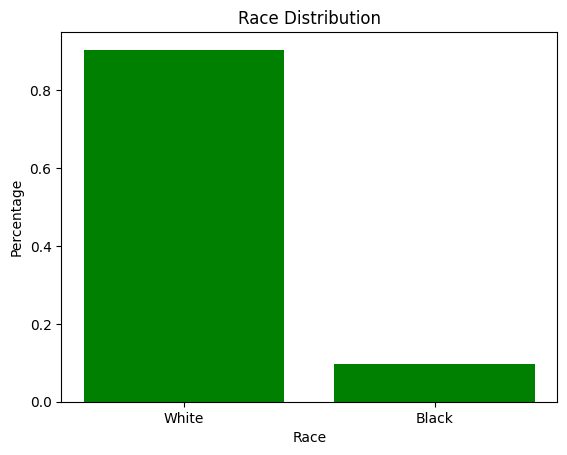

In [21]:
race = ['White', 'Black']
percentage = [white_percentage, black_percentage]
plt.bar(race, percentage, color=['green'])
plt.title('Race Distribution')
plt.xlabel('Race') 
plt.ylabel('Percentage')
plt.show()   

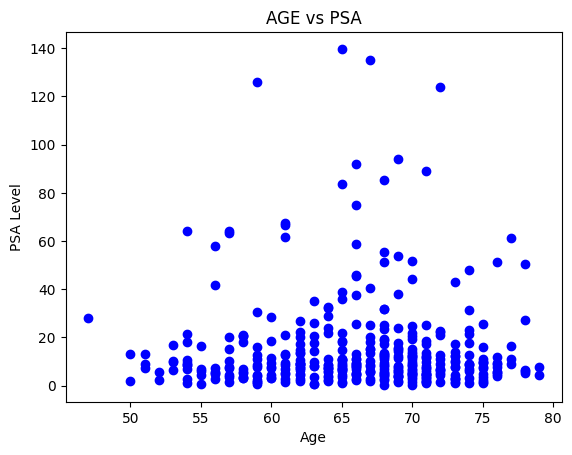

In [22]:
plt.scatter(df['AGE'], df['PSA'], color='blue')
plt.title('AGE vs PSA') 
plt.xlabel('Age') 
plt.ylabel('PSA Level')   
plt.show()

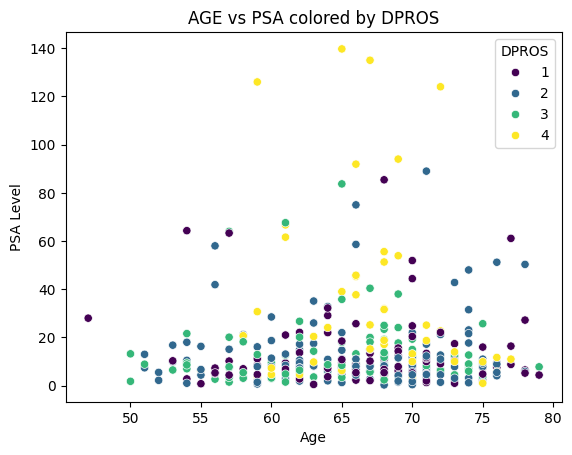

In [23]:
sns.scatterplot(data=df, x='AGE', y='PSA', hue='DPROS', palette='viridis')
plt.title('AGE vs PSA colored by DPROS')
plt.xlabel('Age') 
plt.ylabel('PSA Level') 
plt.show()

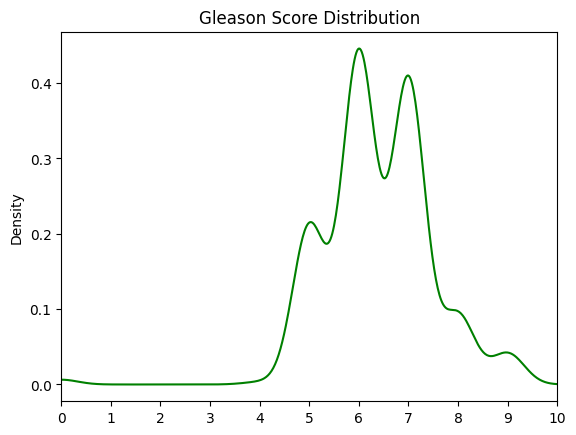

In [24]:
df['GLEASON'].plot(kind='kde', title="Gleason Score Distribution", color='green', 
                     xlim=(df['GLEASON'].min(), df['GLEASON'].max()+1),
                        xlabel='Gleason Score', ylabel='Density',
                     xticks=range(int(df['GLEASON'].min()), int(df['GLEASON'].max())+2))
plt.show()

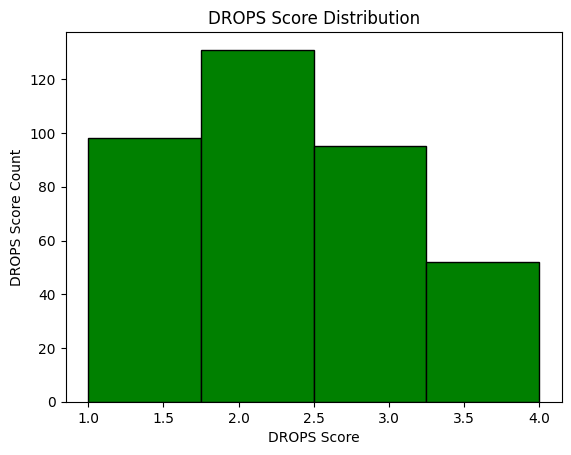

In [25]:
df['DPROS'].plot(kind='hist',title="DROPS Score Distribution", 
                     xlabel='DROPS Score', ylabel='DROPS Score Count',
                     edgecolor='black', color='green', bins=4)
plt.show()


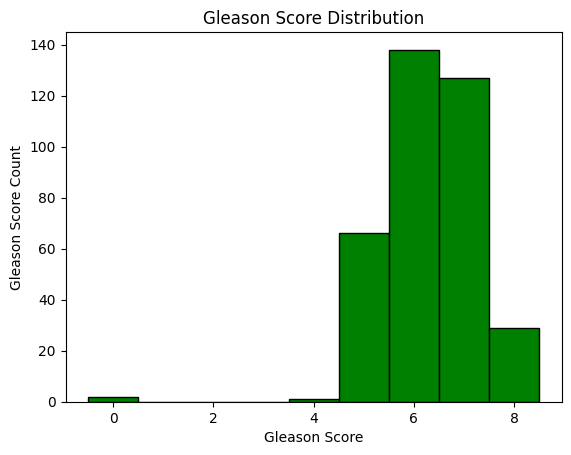

In [26]:
plt.hist(df['GLEASON'], bins=np.arange(0, 10)-.5, edgecolor='black', color='green')
plt.title('Gleason Score Distribution')
plt.ylabel('Gleason Score Count') 
plt.xlabel('Gleason Score')
plt.show()    

In [29]:
# PSA/VOL value
# First convert the PSA mg/ml value to g/cm^3

df['PSA_VOL'] = df['PSA'] * 0.001 # Conversion value 1mg/ml = 0.001 g/cm^3

In [ ]:
# Calculate PSA/VOL value
# VOL units = cm^3
df['PSA_VOL'] = df['PSA_VOL'] * df['VOL']
df['PSA_VOL'] # units in grams

0      0.00000
1      0.00000
2      0.00000
3      1.02400
4      0.68757
        ...   
375    0.52052
376    0.11534
377    0.29645
378    0.01290
379    0.03933
Name: PSA_VOL, Length: 376, dtype: float64

In [31]:
data = df[:10]
data

,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON,PSA_VOL
0,1,0,65,1,2,1,1.4,0.0,6,0.0014
1,2,0,72,1,3,2,6.7,0.0,7,0.0067
2,3,0,70,1,1,2,4.9,0.0,6,0.0049
3,4,0,76,2,2,1,51.2,20.0,7,0.0512
4,5,0,69,1,1,1,12.3,55.9,6,0.0123
5,6,1,71,1,3,2,3.3,0.0,8,0.0033
6,7,0,68,2,4,2,31.9,0.0,7,0.0319
7,8,0,61,2,4,2,66.7,27.2,7,0.0667
8,9,0,69,1,1,1,3.9,24.0,7,0.0039
9,10,0,68,2,1,2,13.0,0.0,6,0.0130


In [34]:
data[0:3]

,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON,PSA_VOL
0,1,0,65,1,2,1,1.4,0.0,6,0.0014
1,2,0,72,1,3,2,6.7,0.0,7,0.0067
2,3,0,70,1,1,2,4.9,0.0,6,0.0049


In [48]:
age = df['AGE']
temp = pd.qcut(age, 4)
temp

0        (62.0, 67.0]
1        (71.0, 79.0]
2        (67.0, 71.0]
3        (71.0, 79.0]
4        (67.0, 71.0]
            ...      
375    (46.999, 62.0]
376      (67.0, 71.0]
377      (71.0, 79.0]
378      (67.0, 71.0]
379      (67.0, 71.0]
Name: AGE, Length: 376, dtype: category
Categories (4, interval[float64, right]): [(46.999, 62.0] < (62.0, 67.0] < (67.0, 71.0] < (71.0, 79.0]]

In [ ]:
age = df['AGE']
temp = pd.qcut(age, 4)
temp

In [52]:
df["Feature"] = pd.cut(df["VOL"], [0 , 0.5, 1], labels=['No', 'Yes'])
df["Feature"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
375    NaN
376    NaN
377    NaN
378    NaN
379    NaN
Name: Feature, Length: 376, dtype: category
Categories (2, object): ['No' < 'Yes']